In [4]:

# text recognition
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# read image
imagePath = 'test1.jpg'
im = cv2.imread(imagePath)
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
text

['THE LAST CAR', 'THAT PARKED HERE', '', 'IS STILL MISSING', '', ' ', '\x0c']

In [6]:
# preprocessing
# gray scale
import cv2
import pytesseract
# read image
imagePath = 'test1.jpg'
im = cv2.imread(imagePath)
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r"img_gray.png",img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"img_blur.png",img)    
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite(r"img_threshold.png",img)
    return img

In [7]:
im_gray = gray(im)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)

contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [8]:
# text detection
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2.imshow('cnt',rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)

In [9]:
# text detection
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2.imshow('cnt',rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)

(1797, 64)
(1797,)
(1797, 8, 8)
0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 181   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   2   0   0   0   0   0   0 172   0]
 [  0   0   0   1   0   1   0   1   0 177]]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]


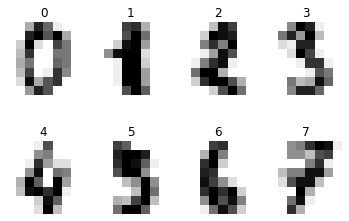

In [10]:
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

digits = load_digits() 
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

print(digits.images.shape)

print(y[0])

print(digits.images[0])

svm = SVC()
svm.fit(X,y)
p = svm.predict(X)
p[0]

print(confusion_matrix(y,p))
print(y)
print(p)
import matplotlib.pyplot as plt

i_g = list(zip(digits.images, digits.target))
for index,(image,label) in enumerate(i_g[:8]):
    plt.subplot(2,4, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap = plt.cm.gray_r)
    plt.title(label)
    
plt.show()